<h1 align="center"> Group 1 Project</h1>

## Phase 2
 - Tim, Timi, Chris

## Table of Contents:
* [Prerequisites](#1)
* [Dealing with Null Values](#2)
* [More Cleaning](#3)
* [OneHotEncode our categorical values](#4)
* [Detecting Multicollinearity](#5)
* [Train Test Split our data](#7)
* [Advanced Modeling](#9)
* [Residual Analysis](#10)

data understanding and business

---
We have been contracted by a building company newly located in King County, WA. They want to enter the housing market and are unsure of which features of a new house are most important when looking to sell.

---

### Prerequisites <a class="anchor" id="1"></a>

In [1]:
# we start by importing the Python libraries that we will be using:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor
plt.rcParams["figure.figsize"] = (13, 10)

In [2]:
df = pd.read_csv('../data/kc_house_data.csv') # load database

df.head() # show first 5 entries

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info() # get a summary of the data, seems like id doesn't need to be used

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Data Processing <a class="anchor" id="2"></a>

---
Right away it looks like the id column is going to be of no use, let's drop it

---

In [4]:
df = df.drop(['id'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [5]:
df.isna().sum() # Looking at the number of total null values in our dataframe, as seen in our .info()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

---
We can see 3 total columns with null values, 2 of which have significantly more than the third. The waterfront column has boolean information on if a house is waterfront or not.

The large total number of null values suggest that we should to see if we can fill them in with meaningful data instead of dropping them altogether.

---

In [6]:
# looking at the first column with null values
df['waterfront'].value_counts() # see how many houses total are waterfronts

NO     19075
YES      146
Name: waterfront, dtype: int64

In [7]:
df['waterfront'] = df['waterfront'].fillna(value='NO') # replace all instances of a null value with NO

In [8]:
df.view.describe() # take a look at the view column

count     21534
unique        5
top        NONE
freq      19422
Name: view, dtype: object

In [9]:
df['view'] = df['view'].fillna(value='NONE') # replace all instances of a null value with NONE

In [10]:
df['yr_renovated'].value_counts() # take a look at the year renovated column

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [11]:
df['yr_renovated'] = df['yr_renovated'].fillna(value=0.0) # replace all instances of a null value with 0.0

---
Important possible categories for our stakeholder, including sqft_basement, are objects, but we need to see if we can get them to a more useful format to use in our analysis.

---

In [12]:
# sqft_basement is an object while the others are numerical, let's investigate
df['sqft_basement'].unique() # with this we can see all unique entries in this particular column,
                             # maybe a string got entered by accident or something similar

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

---
There appears to be instances of a question mark which we should remove

---

In [13]:
df = df[df['sqft_basement'] != '?'] # drop all of the rows that have '?' as their value

In [14]:
df['sqft_basement'] = df['sqft_basement'].astype("float") # convert the remaining values as floats from strings

---
Date also appears to be an object, let's see about that

---

In [15]:
df['date'] # see the formatting of our dates

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21143, dtype: object

In [16]:
# we can split the dates up by year, that should be enough for our stakeholder
df['date'] = [x[-4:] for x in df['date']]

df['date'] = df['date'].astype("int64")

In [17]:
df['waterfront'].value_counts()

NO     21001
YES      142
Name: waterfront, dtype: int64

---
Waterfront appears to be boolean, we should convert it to a string so we can onehotencode it later

---

In [18]:
df['waterfront'] = df['waterfront'].astype(str) # turn our booleans into strings so we can onehotencode

### OneHotEncode our categorical values <a class="anchor" id="4"></a>

We should check the status of our columns

In [19]:
print(df['view'].value_counts())
print(df['condition'].value_counts())
print(df['grade'].value_counts())
print(df['waterfront'].value_counts())

NONE         19079
AVERAGE        930
GOOD           496
FAIR           327
EXCELLENT      311
Name: view, dtype: int64
Average      13726
Good          5557
Very Good     1666
Fair           166
Poor            28
Name: condition, dtype: int64
7 Average        8788
8 Good           5933
9 Better         2557
6 Low Average    1997
10 Very Good     1112
11 Excellent      391
5 Fair            235
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64
NO     21001
YES      142
Name: waterfront, dtype: int64


---
Because our data is both ranked and categorical, we will need to use OrdinalEncode and OneHotEncode

---

In [20]:
df_enc = df.copy() # initialize new dataframe to work with

oe = OrdinalEncoder() # initialize OE
ohe = OneHotEncoder(sparse=False) # initialize OHE
df_enc['view'] = oe.fit_transform(df_enc[['view']]) # ordinally encode our view data
df_enc['condition'] = oe.fit_transform(df_enc[['condition']]) # ordinally encode our condition data
df_enc['grade'] = oe.fit_transform(df_enc[['grade']]) # ordinally encode our grade data
df_enc['waterfront'] = ohe.fit_transform(df_enc[['waterfront']]) # onehotencode our waterfront data

In [21]:
print(df_enc.view.value_counts()) # print out newly encoded categories
print(df_enc.condition.value_counts())
print(df_enc.grade.value_counts())
print(df_enc.waterfront.value_counts())

4.0    19079
0.0      930
3.0      496
2.0      327
1.0      311
Name: view, dtype: int64
0.0    13726
2.0     5557
4.0     1666
1.0      166
3.0       28
Name: condition, dtype: int64
8.0     8788
9.0     5933
10.0    2557
7.0     1997
0.0     1112
1.0      391
6.0      235
2.0       89
5.0       27
3.0       13
4.0        1
Name: grade, dtype: int64
1.0    21001
0.0      142
Name: waterfront, dtype: int64


---
Great! Now all of our categorical data is represented numerically and can be included in our model!

---

In [22]:
df_enc.info() # confirm view and condition are now numerical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21143 non-null  int64  
 1   price          21143 non-null  float64
 2   bedrooms       21143 non-null  int64  
 3   bathrooms      21143 non-null  float64
 4   sqft_living    21143 non-null  int64  
 5   sqft_lot       21143 non-null  int64  
 6   floors         21143 non-null  float64
 7   waterfront     21143 non-null  float64
 8   view           21143 non-null  float64
 9   condition      21143 non-null  float64
 10  grade          21143 non-null  float64
 11  sqft_above     21143 non-null  int64  
 12  sqft_basement  21143 non-null  float64
 13  yr_built       21143 non-null  int64  
 14  yr_renovated   21143 non-null  float64
 15  zipcode        21143 non-null  int64  
 16  lat            21143 non-null  float64
 17  long           21143 non-null  float64
 18  sqft_l

---
### SUCCESS! Now we have a clean dataset to work with

---

### Finding our features <a class="anchor" id="5"></a>

''

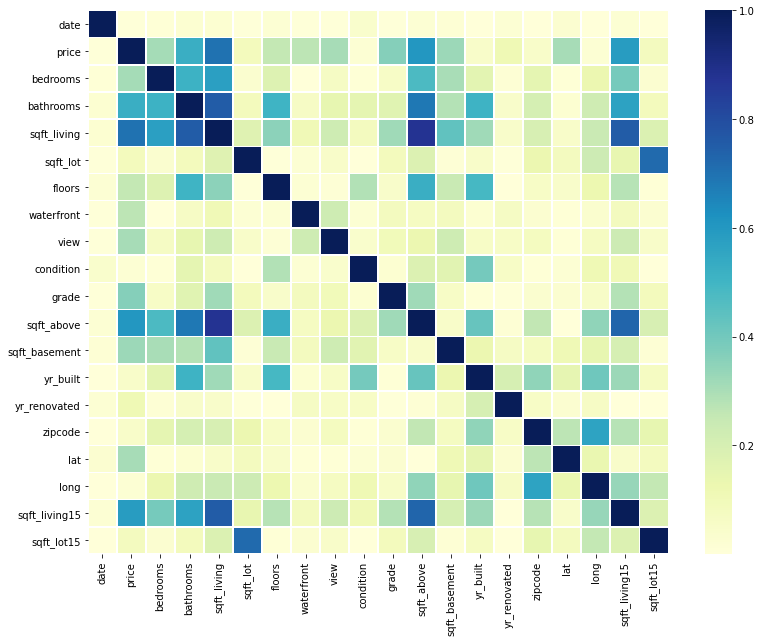

In [23]:
sns.heatmap(df_enc.corr().abs(), cmap="YlGnBu", linewidths=.5) # run a heatmap to detect possible collinearity
;

There are some areas of interest and possible multicollinearity in several of our columns, indicated by the darker regions on the above heatmap

In [24]:
df_enc.describe() # scan our new data for outliers

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21143.000000,2.114300e+04,21143.000000,21143.000000,21143.000000,2.114300e+04,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.00000,21143.000000
mean,2014.323417,5.405107e+05,3.372558,2.116079,2080.920730,1.508714e+04,1.493591,0.993284,3.725536,0.852670,7.823251,1789.069006,291.851724,1971.023223,68.256492,98077.868893,47.560274,-122.213876,1987.27139,12738.941967
std,0.467791,3.680751e+05,0.924917,0.768531,918.547562,4.120920e+04,0.539249,0.081679,0.919889,1.266833,2.307302,828.409769,442.498337,29.321938,362.765827,53.535756,0.138591,0.140597,685.67034,27169.273663
min,2014.000000,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.00000,651.000000
25%,2014.000000,3.220000e+05,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,1.000000,4.000000,0.000000,8.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471250,-122.328000,1490.00000,5100.000000
50%,2014.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,1.000000,4.000000,0.000000,8.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.00000,7626.000000
75%,2015.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.069550e+04,2.000000,1.000000,4.000000,2.000000,9.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.00000,10087.000000
max,2015.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,4.000000,10.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.00000,871200.000000


In [25]:
# one of our houses appears to have 33 bedrooms, since this is a relevant column for our holders let's look into that
df_enc['bedrooms'].sort_values(ascending = False).head()

15856    33
8748     11
15147    10
19239    10
13301    10
Name: bedrooms, dtype: int64

In [26]:
df_enc.loc[[15856]] # inspect our first outlier

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2014,640000.0,33,1.75,1620,6000,1.0,1.0,4.0,4.0,8.0,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


---
The amount of bedrooms appears to betray the square footing on this property. The others at 11 and 10 make sense due to the wealthiness of this counties inhabitants.

---

In [27]:
# it would seem safe to drop our highest outlier in this case
df_enc = df_enc[df_enc.bedrooms <= 11] # drop the outlier row

In [28]:
#df_enc = df_enc.drop(columns=["date"]).copy() # date is no longer relevant so we drop it and create a new dataframe
#df_enc.info()

For the purpose of our stakeholder's needs, we will select 'sqft_living', 'bathrooms','sqft_above', 'bedrooms', and our **relevant location data** three options that show at least mild collinearity from our heatmap and are practical: the lot size, number of total bathrooms and the living space are all very significant when dealing with what to emphasize in a new home.

### Train Test Split <a class="anchor" id="7"></a>

In [29]:
X = df_enc.copy().drop(columns='price')
y = df_enc['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling

In [30]:
ss = StandardScaler() # initialize scaler
ss.fit(X_train) # fit the scaler

#transform both the train and test and set them as objects
X_train_scale = ss.transform(X_train)
X_test_scale = ss.transform(X_test)

In [31]:
X_train_scale = pd.DataFrame(X_train_scale) # Turn our scaled data into a pandas dataframe
X_train_scale.columns = df.drop('price', axis=1).columns # keep our original columns
y_train.reset_index(drop=True, inplace=True)
X_train_scale # see if it worked

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1.444798,-1.508695,-0.474040,1.051216,0.865170,0.936561,0.082378,0.300207,-0.672132,-3.358318,1.525224,-0.658551,0.683062,-0.186918,-0.473827,0.820960,1.161206,1.548812,1.034973
1,1.444798,-0.404417,-0.474040,0.087070,-0.156186,-0.919659,0.082378,0.300207,-0.672132,0.512773,-0.068977,0.309533,0.001344,-0.186918,-0.940940,1.486300,-0.337049,1.345256,-0.119299
2,-0.692138,-0.404417,0.496712,0.487895,-0.038609,0.936561,0.082378,0.300207,-0.672132,0.942895,0.897205,-0.658551,0.751234,-0.186918,-1.109101,1.255600,1.790191,0.676431,0.027211
3,1.444798,-0.404417,1.143880,0.986217,0.381086,0.936561,0.082378,0.300207,-0.672132,-3.358318,1.452760,-0.658551,-0.680374,5.368691,1.431995,1.441462,-0.450125,-0.341347,0.116265
4,1.444798,-0.404417,-0.474040,-0.021260,-0.278194,-0.919659,0.082378,0.300207,2.472696,0.082652,-0.914386,1.660348,-0.680374,-0.186918,0.740668,0.018937,-0.478394,-1.271887,-0.254241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16908,-0.692138,0.699862,0.496712,1.387042,-0.034032,0.936561,0.082378,0.300207,-0.672132,-3.358318,1.899619,-0.658551,0.546719,-0.186918,-0.081452,0.552655,1.217744,1.447034,-0.079799
16909,-0.692138,1.804140,1.467464,1.907030,-0.246879,2.792780,0.082378,-0.786099,-0.672132,-3.358318,1.162905,1.795430,1.262523,-0.186918,1.226465,0.231556,-0.534932,0.109383,-0.299600
16910,-0.692138,-1.508695,-0.474040,-0.346253,-0.256515,-0.919659,0.082378,0.300207,0.900282,0.082652,-1.095545,1.322645,-1.396178,-0.186918,0.460400,0.644500,-0.888294,-0.952014,-0.323036
16911,-0.692138,-0.404417,-0.150456,-0.183757,-0.083655,-0.919659,0.082378,0.300207,-0.672132,0.082652,-0.455449,0.467128,0.239946,-0.186918,-1.258577,1.263556,0.115254,0.080304,-0.150294


In [32]:
# now do the same for our test data
X_test_scale = pd.DataFrame(X_test_scale)
X_test_scale.columns = df.drop('price', axis=1).columns
y_test.reset_index(drop=True, inplace=True)
X_test_scale

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1.444798,-0.404417,1.791048,1.072882,-0.192680,-0.919659,0.082378,-0.786099,-0.672132,0.512773,-0.262213,2.718487,-1.464350,5.349275,0.871459,1.061061,-0.435991,0.531034,-0.258740
1,-0.692138,-0.404417,-0.797624,-0.703745,-0.237244,-0.919659,0.082378,0.300207,0.900282,0.082652,-0.914386,0.241992,0.205860,-0.186918,-0.679357,-1.420945,0.850247,-1.155570,-0.284481
2,-0.692138,0.699862,0.496712,0.975384,-0.150862,0.936561,0.082378,0.300207,-0.672132,0.512773,1.440683,-0.658551,1.092093,-0.186918,-0.754095,-1.322591,1.302551,1.447034,-0.227102
3,-0.692138,0.699862,0.496712,0.673141,-0.222285,0.936561,0.082378,0.300207,-0.672132,0.082652,1.103727,-0.658551,1.432952,-0.186918,0.254870,-1.978529,0.263666,0.845091,-0.260176
4,1.444798,-0.404417,-1.444792,-1.169568,-0.158474,-0.919659,0.082378,0.300207,0.900282,-0.347469,-0.950618,-0.658551,-0.271343,-0.186918,-1.034363,-1.846184,-1.100312,-1.402744,-0.160878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,1.444798,-0.404417,-0.150456,0.921219,0.339341,0.936561,0.082378,0.300207,-0.672132,0.512773,0.546964,0.894886,0.648976,-0.186918,-1.277261,-1.812917,1.217744,0.182081,0.628821
4225,-0.692138,-1.508695,-0.797624,-0.909574,-0.337091,0.936561,0.082378,0.300207,-0.672132,0.512773,-0.709072,-0.568497,-0.134999,-0.186918,-1.314631,0.358115,0.723037,-0.835697,-0.430385
4226,1.444798,-0.404417,-0.474040,-0.790410,-0.145707,-0.919659,0.082378,0.300207,-0.672132,0.082652,-0.527913,-0.658551,0.546719,-0.186918,-0.623303,-0.811292,3.118832,-0.893855,-0.121945
4227,1.444798,-0.404417,-0.150456,-0.194590,-0.122221,-0.919659,0.082378,0.300207,-0.672132,0.512773,-0.346754,0.241992,0.069516,-0.186918,-0.959625,-0.218272,1.132937,0.225700,-0.109660


In [33]:
df_train_scale = pd.concat([X_train_scale, y_train], axis=1) # join both train and test into respective dataframes
df_test_scale = pd.concat([X_test_scale, y_test], axis=1)    # keeping our dependent variable (price)

### Making Base Model

In [34]:
model1 = DummyRegressor(strategy='mean', constant=df_train_scale['price'].mean()) # get a dummy prediction mean

model1

DummyRegressor(constant=540631.1560929463)

Our Predicted average for price of a house in King County is $540,631, which is a good starting point. Now let's run an OLS model on the columns we determined earlier were most important.

In [ ]:
formula = f'price ~ '
model = ols(formula,X_train_scaled_final).fit()
model.summary()

### Advanced Modeling <a class="anchor" id="9"></a>

In [35]:
formula2='price ~' + ' + '.join(df_train.columns.drop('price'))

mod = smf.ols(formula=formula2, data=df_train)

res = mod.fit()

print(res.summary())

NameError: name 'df_train' is not defined

In [ ]:
column_names = df_train.describe().columns

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value']]

for idx, value in enumerate(column_names):
    print("price~" + value) # labeling our results with their respective values
    f = 'price~' + value # initialize our formula
    model = smf.ols(formula=f, data=df_train).fit() # fitting our line
    results.append([value, model.rsquared, model.params[0], model.params[1], model.pvalues[1]]) # add each values data to our results
    print(results[idx+1]) # view our results
    print(model.summary()) # shows the regression diagnostics summary

In [ ]:
pd.DataFrame(results)

---

Our r-squared data here indicates the percentage of the variance in our target variable (price).

The three most relevant categories from here seem to be bathrooms, the foot^2 of living area, and the grade.

This information is valid but it's factoring in too many things that aren't relevant. Let's try simplifying our model to only our most correlated columns.

---

---
Let's run another model, cutting out some columns with lower variance in relation to the price of homes.

---

In [ ]:
formula3='price ~ bathrooms + sqft_living + sqft_above'

mod = smf.ols(formula=formula3, data=df_train)

res = mod.fit()

print(res.summary())

### Residual Analysis <a class="anchor" id="10"></a>